<Figure size 1200x600 with 0 Axes>

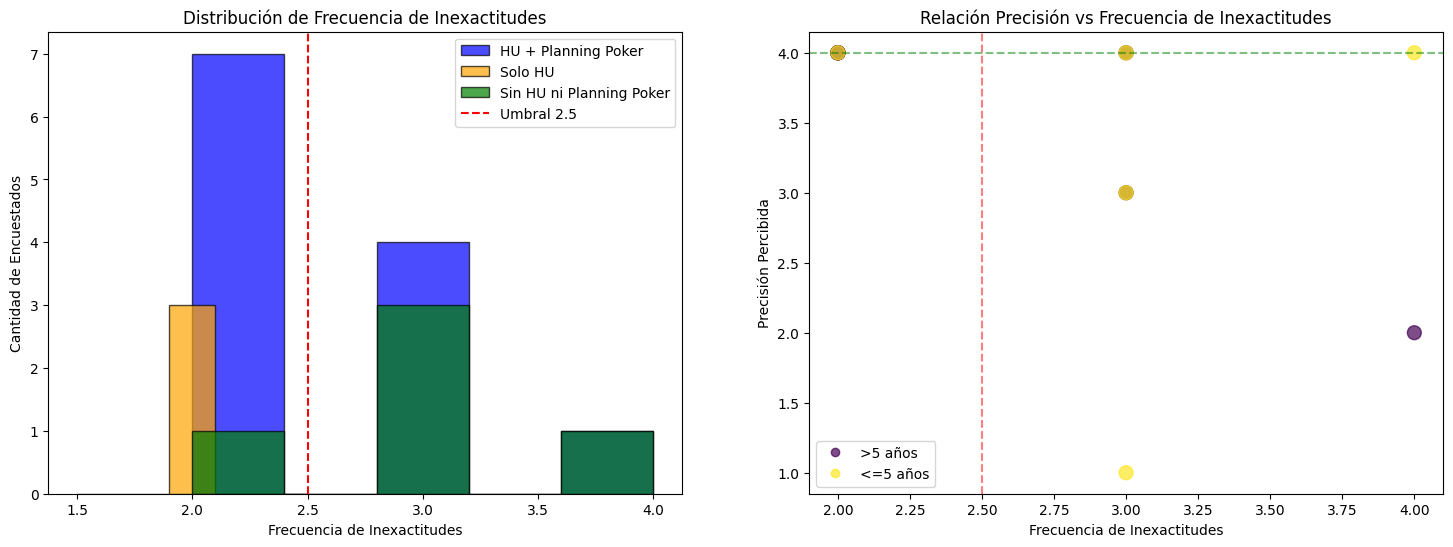

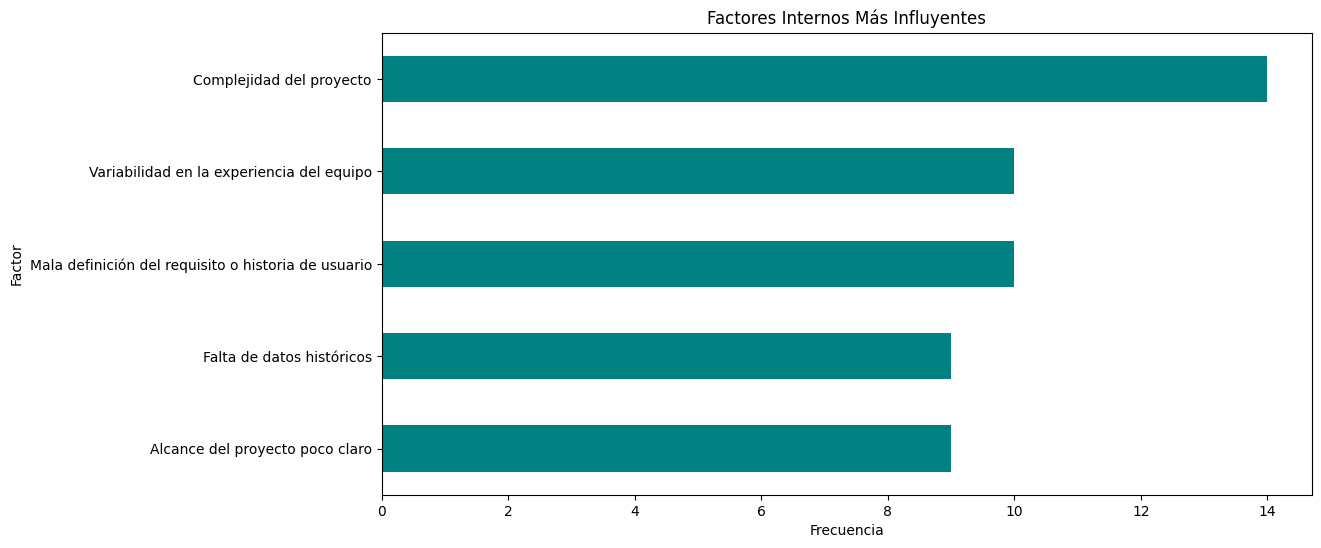

<Figure size 1400x700 with 0 Axes>

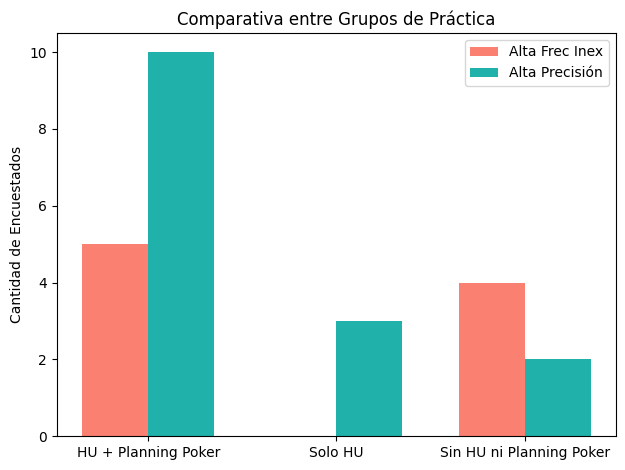

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


pd.set_option('display.max_columns', None)


df = pd.read_csv('Relavamiento estimación ágil (respuestas) - Respuestas de formulario 1.csv')


df = df[df['¿Trabaja con un enfoque ágil de desarrollo de software?'].str.contains('Si', case=False, na=False)]


def clasificar_grupo(row):
    hu = str(row['En su equipo, ¿Se utiliza "puntos historia" para determinar la estimación de esfuerzo de cada historia de usuario?'])
    pp = str(row['Si utiliza puntos historia, ¿Realiza el proceso de estimación según la práctica "Planning Poker"?'])
    
    if 'Sí' in pp and 'Si' in hu: return 'HU + Planning Poker'
    if 'No' in pp and 'Si' in hu: return 'Solo HU'
    return 'Sin HU ni Planning Poker'

df['Grupo'] = df.apply(clasificar_grupo, axis=1)

# 1. Gráfico comparativo de frecuencia de inexactitudes
plt.figure(figsize=(12, 6))


df['FI'] = pd.to_numeric(df['¿Con qué frecuencia encuentra inexactitudes en las estimaciones?'], errors='coerce')
df_filtrado = df.dropna(subset=['FI'])


groups = df_filtrado.groupby('Grupo')
categories = ['HU + Planning Poker', 'Solo HU', 'Sin HU ni Planning Poker']


fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Distribución de frecuencia de inexactitudes
colors = ['blue', 'orange', 'green'] 

for i, group in enumerate(categories):
    if group in groups.groups:
        data = groups.get_group(group)['FI']
        axs[0].hist(data, bins=5, alpha=0.7, label=group, edgecolor='black', color=colors[i])
    else:
        print(f"No hay datos para el grupo: {group}")

axs[0].axvline(2.5, color='red', linestyle='--', label='Umbral 2.5')
axs[0].set_title('Distribución de Frecuencia de Inexactitudes')
axs[0].set_xlabel('Frecuencia de Inexactitudes')
axs[0].set_ylabel('Cantidad de Encuestados')
axs[0].legend()

# Gráfico 2: Precisión vs Experiencia
experiencia_labels = ['>5 años' if 'Más de 5' in str(x) else '<=5 años' 
                    for x in df_filtrado['¿Cuántos años de experiencia tiene en desarrollo de software?']]

scatter = axs[1].scatter(
    x=df_filtrado['FI'],
    y=pd.to_numeric(df_filtrado['¿Qué tan precisas considera que son las estimaciones de su equipo?'], errors='coerce'),
    c=[0 if e == '>5 años' else 1 for e in experiencia_labels],
    cmap='viridis',
    alpha=0.7,
    s=100
)

axs[1].axhline(4, color='green', linestyle='--', alpha=0.5)
axs[1].axvline(2.5, color='red', linestyle='--', alpha=0.5)
axs[1].set_title('Relación Precisión vs Frecuencia de Inexactitudes')
axs[1].set_xlabel('Frecuencia de Inexactitudes')
axs[1].set_ylabel('Precisión Percibida')
axs[1].legend(handles=scatter.legend_elements()[0], labels=['>5 años', '<=5 años'])

# 2. Gráfico de factores influyentes
plt.figure(figsize=(12, 6))
factores = df['¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)']
factores = factores.str.split(', ').explode().value_counts().head(5)

factores.plot(kind='barh', color='teal')
plt.title('Factores Internos Más Influyentes')
plt.xlabel('Frecuencia')
plt.ylabel('Factor')
plt.gca().invert_yaxis()

# 3. Gráfico comparativo entre grupos
plt.figure(figsize=(14, 7))
metrics = {
    'Alta Frecuencia (>2.5)': [
        len(df_filtrado[(df_filtrado['Grupo']=='HU + Planning Poker') & (df_filtrado['FI']>2.5)]),
        len(df_filtrado[(df_filtrado['Grupo']=='Solo HU') & (df_filtrado['FI']>2.5)]),
        len(df_filtrado[(df_filtrado['Grupo']=='Sin HU ni Planning Poker') & (df_filtrado['FI']>2.5)])
    ],
    'Precisión >=4': [
        len(df[(df['Grupo']=='HU + Planning Poker') & (pd.to_numeric(df['¿Qué tan precisas considera que son las estimaciones de su equipo?']) >=4)]),
        len(df[(df['Grupo']=='Solo HU') & (pd.to_numeric(df['¿Qué tan precisas considera que son las estimaciones de su equipo?']) >=4)]),
        len(df[(df['Grupo']=='Sin HU ni Planning Poker') & (pd.to_numeric(df['¿Qué tan precisas considera que son las estimaciones de su equipo?']) >=4)])
    ]
}

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, metrics['Alta Frecuencia (>2.5)'], width, label='Alta Frec Inex', color='salmon')
rects2 = ax.bar(x + width/2, metrics['Precisión >=4'], width, label='Alta Precisión', color='lightseagreen')

ax.set_ylabel('Cantidad de Encuestados')
ax.set_title('Comparativa entre Grupos de Práctica')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

In [27]:
print(df.groupby('Grupo')['FI'].count())

Grupo
HU + Planning Poker         12
Sin HU ni Planning Poker     5
Solo HU                      3
Name: FI, dtype: int64


In [ ]:
df_graficos = df_filtrado[[
    '¿Trabaja con un enfoque ágil de desarrollo de software?',
    'En su equipo, ¿Se utiliza "puntos historia" para determinar la estimación de esfuerzo de cada historia de usuario?',
    'Si utiliza puntos historia, ¿Realiza el proceso de estimación según la práctica "Planning Poker"?',
    '¿Cuántos años de experiencia tiene en desarrollo de software?',
    '¿Qué tan precisas considera que son las estimaciones de su equipo?',
    '¿Con qué frecuencia encuentra inexactitudes en las estimaciones?',
    '¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen)',
    'Grupo', 
    'FI'  
]].copy()


df_graficos['FI'] = pd.to_numeric(df_graficos['FI'], errors='coerce')
df_graficos['¿Qué tan precisas considera que son las estimaciones de su equipo?'] = pd.to_numeric(
    df_graficos['¿Qué tan precisas considera que son las estimaciones de su equipo?'], errors='coerce'
)

df_graficos

,¿Trabaja con un enfoque ágil de desarrollo de software?,"En su equipo, ¿Se utiliza ""puntos historia"" para determinar la estimación de esfuerzo de cada historia de usuario?","Si utiliza puntos historia, ¿Realiza el proceso de estimación según la práctica ""Planning Poker""?",¿Cuántos años de experiencia tiene en desarrollo de software?,¿Qué tan precisas considera que son las estimaciones de su equipo?,¿Con qué frecuencia encuentra inexactitudes en las estimaciones?,¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen),Grupo,FI
0,Si,Si,Sí,Entre 3 y 5 años,4.0,2.0,Ninguna de las anteriores,HU + Planning Poker,2.0
3,Si,Si,Sí,Más de 5 años,4.0,2.0,"Variabilidad en la experiencia del equipo, Com...",HU + Planning Poker,2.0
5,Si,No,No,Menos de 1 año,1.0,3.0,"Falta de datos históricos, Variabilidad en la ...",Sin HU ni Planning Poker,3.0
6,Si,Si,Sí,Entre 1 y 3 años,4.0,2.0,"Falta de datos históricos, Mala definición del...",HU + Planning Poker,2.0
11,Si,Si,Sí,Más de 5 años,4.0,2.0,"Falta de datos históricos, Variabilidad en la ...",HU + Planning Poker,2.0
12,Si,Si,Sí,Entre 3 y 5 años,4.0,4.0,"Variabilidad en la experiencia del equipo, Hab...",HU + Planning Poker,4.0
14,Si,Si,Sí,Más de 5 años,4.0,2.0,"Falta de datos históricos, Mala definición del...",HU + Planning Poker,2.0
17,Si,Si,Sí,Entre 1 y 3 años,3.0,3.0,"Variabilidad en la experiencia del equipo, Com...",HU + Planning Poker,3.0
18,Si,No,No,Entre 1 y 3 años,4.0,2.0,"Complejidad del proyecto, Alcance del proyecto...",Sin HU ni Planning Poker,2.0
22,Si,No,No,Entre 1 y 3 años,4.0,3.0,Complejidad del proyecto,Sin HU ni Planning Poker,3.0


In [ ]:
df_hu_pp = df_graficos[df_graficos['Grupo'] == 'HU + Planning Poker']
df_solo_hu = df_graficos[df_graficos['Grupo'] == 'Solo HU']
df_sin_hu_pp = df_graficos[df_graficos['Grupo'] == 'Sin HU ni Planning Poker']

df_hu_pp



,¿Trabaja con un enfoque ágil de desarrollo de software?,"En su equipo, ¿Se utiliza ""puntos historia"" para determinar la estimación de esfuerzo de cada historia de usuario?","Si utiliza puntos historia, ¿Realiza el proceso de estimación según la práctica ""Planning Poker""?",¿Cuántos años de experiencia tiene en desarrollo de software?,¿Qué tan precisas considera que son las estimaciones de su equipo?,¿Con qué frecuencia encuentra inexactitudes en las estimaciones?,¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen),Grupo,FI
0,Si,Si,Sí,Entre 3 y 5 años,4.0,2.0,Ninguna de las anteriores,HU + Planning Poker,2.0
3,Si,Si,Sí,Más de 5 años,4.0,2.0,"Variabilidad en la experiencia del equipo, Com...",HU + Planning Poker,2.0
6,Si,Si,Sí,Entre 1 y 3 años,4.0,2.0,"Falta de datos históricos, Mala definición del...",HU + Planning Poker,2.0
11,Si,Si,Sí,Más de 5 años,4.0,2.0,"Falta de datos históricos, Variabilidad en la ...",HU + Planning Poker,2.0
12,Si,Si,Sí,Entre 3 y 5 años,4.0,4.0,"Variabilidad en la experiencia del equipo, Hab...",HU + Planning Poker,4.0
14,Si,Si,Sí,Más de 5 años,4.0,2.0,"Falta de datos históricos, Mala definición del...",HU + Planning Poker,2.0
17,Si,Si,Sí,Entre 1 y 3 años,3.0,3.0,"Variabilidad en la experiencia del equipo, Com...",HU + Planning Poker,3.0
25,Si,Si,Sí,Más de 5 años,4.0,2.0,"Variabilidad en la experiencia del equipo, Hab...",HU + Planning Poker,2.0
28,Si,Si,Sí,Entre 1 y 3 años,4.0,2.0,"Variabilidad en la experiencia del equipo, Com...",HU + Planning Poker,2.0
31,Si,Si,Sí,Más de 5 años,4.0,3.0,"Falta de datos históricos, Variabilidad en la ...",HU + Planning Poker,3.0


In [38]:
df_solo_hu

,¿Trabaja con un enfoque ágil de desarrollo de software?,"En su equipo, ¿Se utiliza ""puntos historia"" para determinar la estimación de esfuerzo de cada historia de usuario?","Si utiliza puntos historia, ¿Realiza el proceso de estimación según la práctica ""Planning Poker""?",¿Cuántos años de experiencia tiene en desarrollo de software?,¿Qué tan precisas considera que son las estimaciones de su equipo?,¿Con qué frecuencia encuentra inexactitudes en las estimaciones?,¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen),Grupo,FI
32,Si,Si,No,Más de 5 años,4.0,2.0,"Alcance del proyecto poco claro, Mala definici...",Solo HU,2.0
36,Si,Si,No,Más de 5 años,4.0,2.0,"Falta de datos históricos, Alcance del proyect...",Solo HU,2.0
41,Si,Si,No,Entre 1 y 3 años,4.0,2.0,"Complejidad del proyecto, Alcance del proyecto...",Solo HU,2.0


In [39]:
df_sin_hu_pp

,¿Trabaja con un enfoque ágil de desarrollo de software?,"En su equipo, ¿Se utiliza ""puntos historia"" para determinar la estimación de esfuerzo de cada historia de usuario?","Si utiliza puntos historia, ¿Realiza el proceso de estimación según la práctica ""Planning Poker""?",¿Cuántos años de experiencia tiene en desarrollo de software?,¿Qué tan precisas considera que son las estimaciones de su equipo?,¿Con qué frecuencia encuentra inexactitudes en las estimaciones?,¿Cuáles considera que son los principales factores internos que afectan la precisión de las estimaciones en su equipo? (Seleccione todas las opciones que apliquen),Grupo,FI
5,Si,No,No,Menos de 1 año,1.0,3.0,"Falta de datos históricos, Variabilidad en la ...",Sin HU ni Planning Poker,3.0
18,Si,No,No,Entre 1 y 3 años,4.0,2.0,"Complejidad del proyecto, Alcance del proyecto...",Sin HU ni Planning Poker,2.0
22,Si,No,No,Entre 1 y 3 años,4.0,3.0,Complejidad del proyecto,Sin HU ni Planning Poker,3.0
23,Si,No,No,Más de 5 años,3.0,3.0,"Variabilidad en la experiencia del equipo, Hab...",Sin HU ni Planning Poker,3.0
34,Si,No,No,Más de 5 años,2.0,4.0,"Falta de datos históricos, Habilidades técnica...",Sin HU ni Planning Poker,4.0


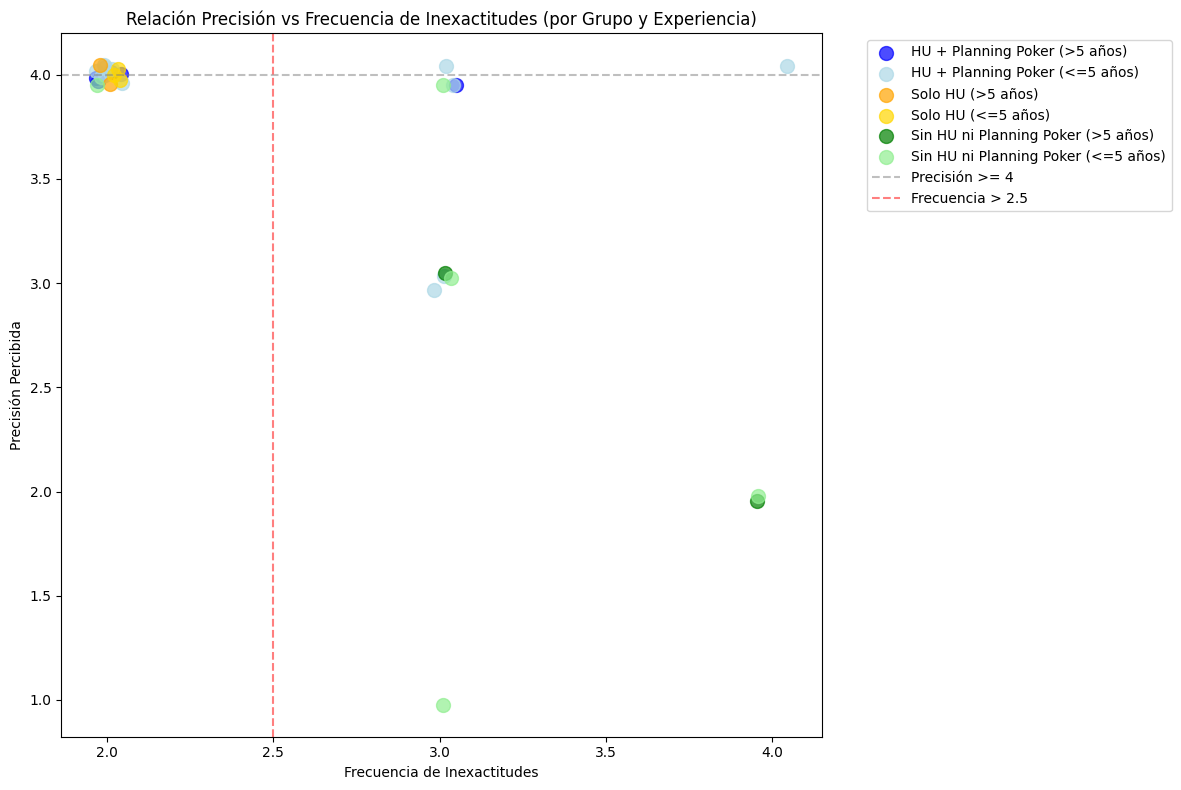

In [ ]:
# Gráfico 2: Precisión vs Experiencia, diferenciando por grupo y experiencia
fig, ax = plt.subplots(figsize=(12, 8))


group_experience_colors = {
    ('HU + Planning Poker', '>5 años'): 'blue',
    ('HU + Planning Poker', '<=5 años'): 'lightblue',
    ('Solo HU', '>5 años'): 'orange',
    ('Solo HU', '<=5 años'): 'gold',
    ('Sin HU ni Planning Poker', '>5 años'): 'green',
    ('Sin HU ni Planning Poker', '<=5 años'): 'lightgreen'
}


for (group, experience), color in group_experience_colors.items():
    group_data = df_filtrado[
        (df_filtrado['Grupo'] == group) &
        (df_filtrado['¿Cuántos años de experiencia tiene en desarrollo de software?'].str.contains('Más de 5') if experience == '>5 años' else True)
    ]
    
    
    jitter_x = np.random.uniform(-0.05, 0.05, size=len(group_data))
    jitter_y = np.random.uniform(-0.05, 0.05, size=len(group_data))
    
    ax.scatter(
        x=group_data['FI'] + jitter_x,
        y=pd.to_numeric(group_data['¿Qué tan precisas considera que son las estimaciones de su equipo?'], errors='coerce') + jitter_y,
        label=f"{group} ({experience})",
        color=color,
        alpha=0.7,
        s=100
    )


ax.axhline(4, color='gray', linestyle='--', alpha=0.5, label='Precisión >= 4')
ax.axvline(2.5, color='red', linestyle='--', alpha=0.5, label='Frecuencia > 2.5')


ax.set_title('Relación Precisión vs Frecuencia de Inexactitudes (por Grupo y Experiencia)')
ax.set_xlabel('Frecuencia de Inexactitudes')
ax.set_ylabel('Precisión Percibida')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()

<div style="font-size: 40px; font-family: Verdana;">
    Explicacion 
</div>
</br>
</br>
<div style="font-size: 20px; font-family: Verdana;">
    El gráfico mostrará un único círculo por combinación de grupo y experiencia. El tamaño del círculo será proporcional a la cantidad de encuestados en esa categoría, y su posición estará determinada por los promedios de frecuencia de inexactitudes y precisión percibida.
</div>

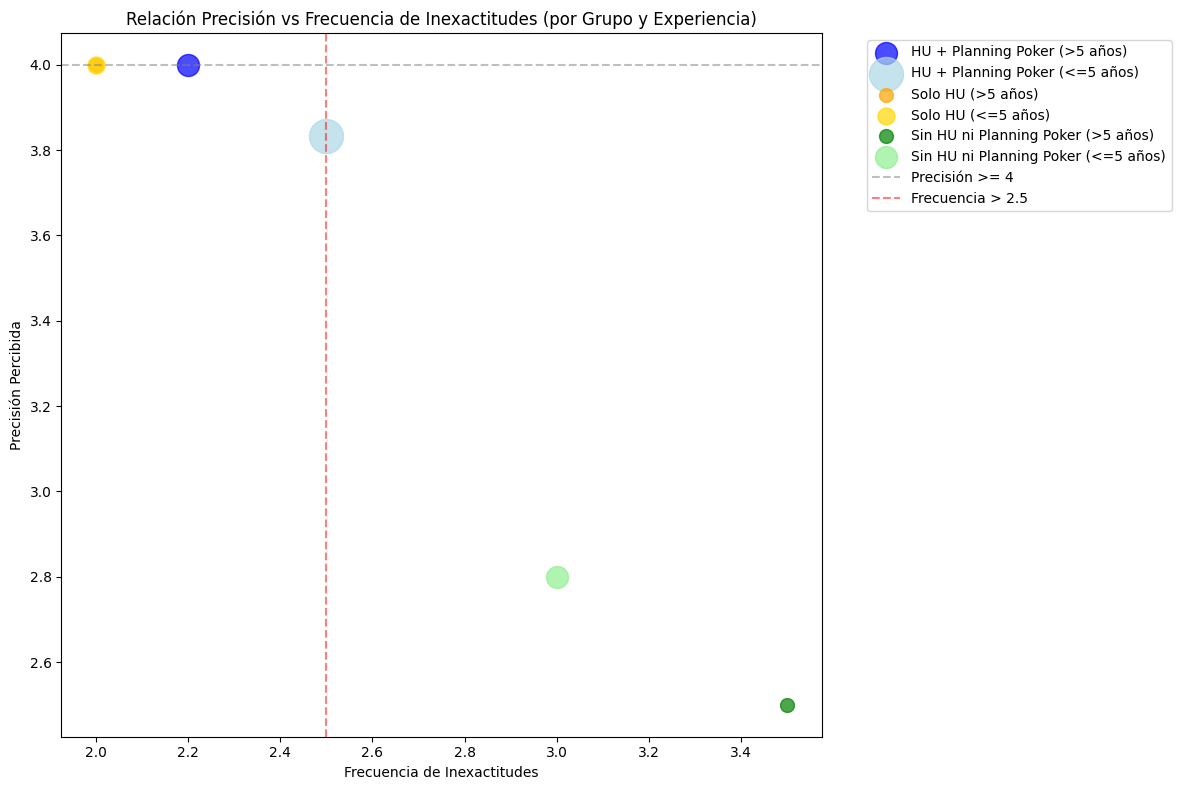

In [ ]:
# Gráfico 2: Precisión vs Experiencia, diferenciando por grupo y experiencia
fig, ax = plt.subplots(figsize=(12, 8))


group_experience_colors = {
    ('HU + Planning Poker', '>5 años'): 'blue',
    ('HU + Planning Poker', '<=5 años'): 'lightblue',
    ('Solo HU', '>5 años'): 'orange',
    ('Solo HU', '<=5 años'): 'gold',
    ('Sin HU ni Planning Poker', '>5 años'): 'green',
    ('Sin HU ni Planning Poker', '<=5 años'): 'lightgreen'
}


summary_data = []


for (group, experience), color in group_experience_colors.items():
    group_data = df_filtrado[
        (df_filtrado['Grupo'] == group) &
        (df_filtrado['¿Cuántos años de experiencia tiene en desarrollo de software?'].str.contains('Más de 5') if experience == '>5 años' else True)
    ]
    
    if not group_data.empty:
        
        avg_fi = group_data['FI'].mean()
        avg_precision = pd.to_numeric(group_data['¿Qué tan precisas considera que son las estimaciones de su equipo?'], errors='coerce').mean()
        count = len(group_data)  
        
        
        summary_data.append({
            'Grupo': group,
            'Experiencia': experience,
            'FI': avg_fi,
            'Precisión': avg_precision,
            'Cantidad': count,
            'Color': color
        })


for data in summary_data:
    ax.scatter(
        x=data['FI'],
        y=data['Precisión'],
        s=data['Cantidad'] * 50,  
        color=data['Color'],
        alpha=0.7,
        label=f"{data['Grupo']} ({data['Experiencia']})"
    )


ax.axhline(4, color='gray', linestyle='--', alpha=0.5, label='Precisión >= 4')
ax.axvline(2.5, color='red', linestyle='--', alpha=0.5, label='Frecuencia > 2.5')


ax.set_title('Relación Precisión vs Frecuencia de Inexactitudes (por Grupo y Experiencia)')
ax.set_xlabel('Frecuencia de Inexactitudes')
ax.set_ylabel('Precisión Percibida')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()
plt.show()